#### **Drive Link**: 
https://drive.google.com/drive/folders/1o3pV_CvTpOpulKVgcsbfMkFVwGUstdGi?usp=sharing 


###### Colab : https://colab.research.google.com/drive/1F1hWMhFEJJuFwk7Oqtg49jDS62xvHl9y?authuser=1#scrollTo=vpjUzafGp23h


##### RESORUCES Followed:  
- **Sentiment Analysis with BERT and TensorFlow:** https://databasecamp.de/en/use-case/bert-sentiment-analysis 
- **Original Paper on BERT :** https://arxiv.org/pdf/1810.04805.pdf 
- **BERT, RoBERTa, DistilBERT, XLNet — which one to use?** https://towardsdatascience.com/bert-roberta-distilbert-xlnet-which-one-to-use-3d5ab82ba5f8  

- **BERT Variants and their Differences** : https://360digitmg.com/bert-variants-and-their-differences 

- **Understand BERT**: https://www.youtube.com/watch?v=7kLi8u2dJz0&ab_channel=codebasics
   - **BERT Repo** : https://github.com/google-research/bert 
   - **BERT Research - Ep. 1 - Key Concepts & Sources** : http://mccormickml.com/2019/11/11/bert-research-ep-1-key-concepts-and-sources/ 
   - **Open Sourcing BERT: State-of-the-Art Pre-training for Natural Language Processing :** https://ai.googleblog.com/2018/11/open-sourcing-bert-state-of-art-pre.html 

- **BERT Technology introduced in 3-minutes :** https://towardsdatascience.com/bert-technology-introduced-in-3-minutes-2c2f9968268c  

- **Blog by Jay Alammar**: http://jalammar.github.io/illustrated-bert/
- **Demystifying BERT: A Comprehensive Guide to the Groundbreaking NLP Framework** : https://www.analyticsvidhya.com/blog/2019/09/demystifying-bert-groundbreaking-nlp-framework/ 

- **BERT Model Tensorflow Hub:** https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/4
- **Different types of BERT models :** https://tfhub.dev/google/collections/bert/1


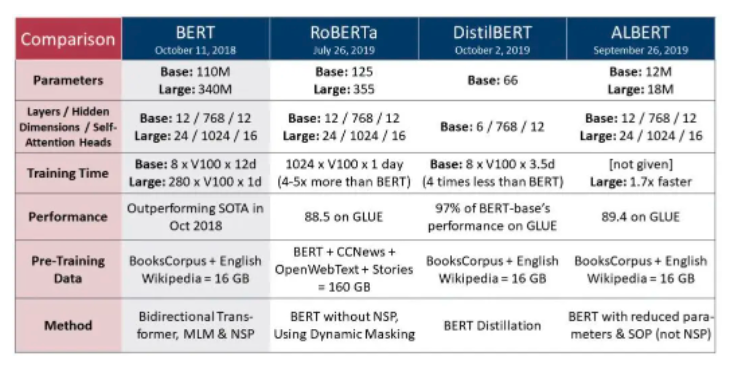

>- sample project 1: https://colab.research.google.com/github/tensorflow/hub/blob/master/examples/colab/tf2_text_classification.ipynb
- sample project 2 : https://analyticsindiamag.com/a-guide-to-text-preprocessing-using-bert/

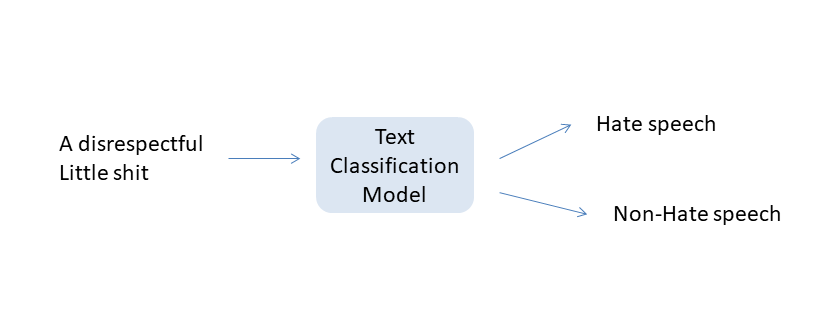

# **BERT**

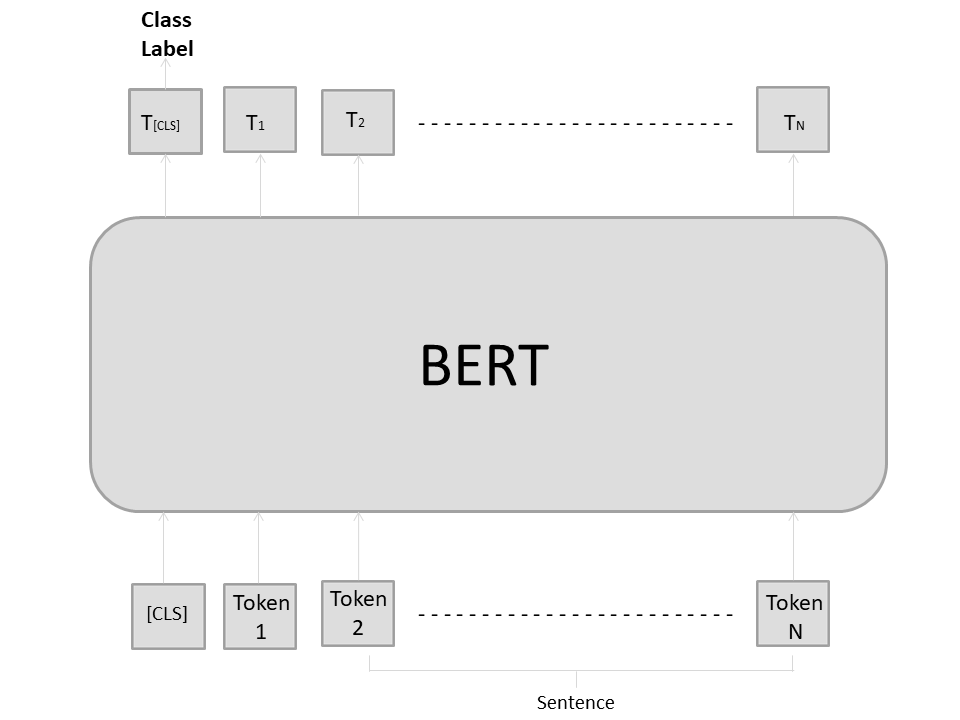

- academic paper which describes BERT : https://github.com/tensorflow/models/tree/master/official/legacy/bert 

- very popular language model -- BERT

BERT stands for Bidirectional Encoder Representations from Transformers and is built on multiple recent techniques in natural language processing and computer vision. Essentially BERT is a Deep Learning based natural language representation methodology that brings the concept of ‘Transfer Learning’ to NLP and can be fine tuned to work with a number of downstream NLP use-cases such text classification, question answering, text summarization, semantic similarity etc. It benefits from being a Bi-Directional model which means that it exploits the forward sequence of a sentence as well as the reverse. Inclusion of the reverse sequence helps learning from context and keywords which have not been “seen yet” in the natural forward sequence processing and are potentially important in constituting the overall meaning of the sentence. Bi-Directionality however, is something which is not novel to BERT and have been around for a while. Likewise ‘Attention’ is more of a general concept in Deep Learning and was thought much before BERT. BERT uses ‘self-attention’ based on this similar notion.





- BERT Models are of Two types :
    - BERT(base)
    - BERT(large)

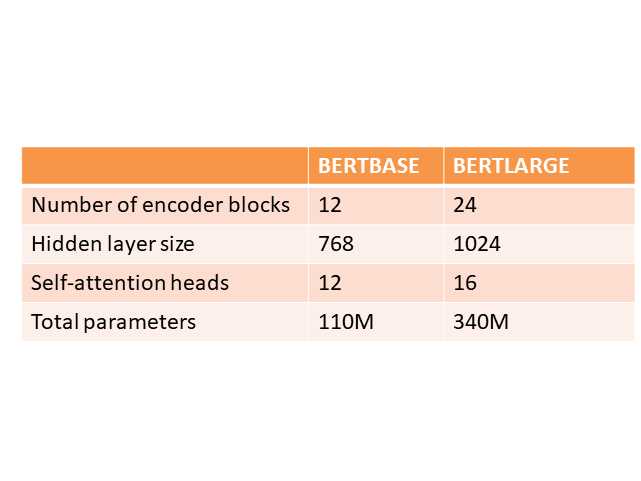

# **Dataset & Dependencies**

 **Importing required libraries**

In [1]:
!pip install tensorflow_text

^C


In [30]:
!pip install chart_studio

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 64 kB 2.7 MB/s 
  Created wheel for retrying: filename=retrying-1.3.3-py3-none-any.whl size=11447 sha256=a29668eb64f3501fa6e7ecc47098a78abd979bc1fb3be6a2e55faa993c843946
  Stored in directory: /root/.cache/pip/wheels/f9/8d/8d/f6af3f7f9eea3553bc2fe6d53e4b287dad18b06a861ac56ddf
Successfully built retrying


In [34]:
!pip install textstat

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 105 kB 15.1 MB/s 
     |████████████████████████████████| 2.0 MB 64.0 MB/s 


In [35]:
import re
import tensorflow as tf
import tensorflow_hub as hub
#import tensorflow_text as text
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as plt 
from nltk.stem.porter import PorterStemmer
import nltk 
nltk.download('stopwords')
from nltk.corpus import stopwords
import plotly.graph_objs as go
import chart_studio.plotly as py
import plotly.figure_factory as ff
from plotly.offline import iplot
import cufflinks
cufflinks.go_offline()
cufflinks.set_config_file(world_readable=True, theme='pearl')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [3]:
#check tensorflow version
print(tf.version.VERSION)

2.9.1


 **Read the Dataset**

In [4]:
#upload the dataset

from google.colab import files
uploaded = files.upload()

Saving _Text__HateSpeech_V2.csv to _Text__HateSpeech_V2.csv


In [5]:
#reading the dataset

df = pd.read_csv("/content/_Text__HateSpeech_V2.csv")
df.sample(5)

,Serial,Text,Labels
193,195,You're an ugly fat cunt whore. You need to odee,1
203,205,"Hey pal, i am your father.",0
213,215,She always needs you .,0
131,133,I am furious !,1
85,87,"enough, i just want to be left the hell alone !",1


In [6]:
df.set_index('Serial', inplace=True)
df

,Text,Labels
Serial,,
1,these hoes like niggas that spend money not t...,1
2,You Motherfucker!,1
3,You Shut up! Shut up! Shut up!,1
4,Huh? What the fuck is done for me?,1
5,I am just the crazy slut with a dead husband h...,1
...,...,...
247,ya'll niggers have a good thanksgiving,1
248,why tf is this bitch in my class wearing all b...,1
249,"when Em said ""I'm on my straight grizzly, so w...",1


In [7]:
df.shape

(250, 2)

# **Exploratory Data Analysis**

**Checking the Data Distribution**

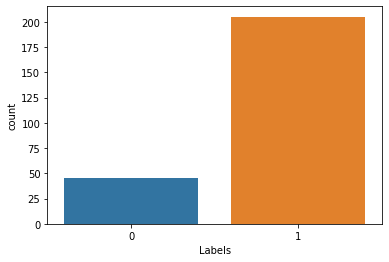

In [8]:
sns.countplot(x = 'Labels', data =df)

In [9]:
df['Labels'].value_counts(normalize=True)

1    0.82
0    0.18
Name: Labels, dtype: float64

In [10]:
#returns description of the data in the DataFrame
#used for calculating some statistical data like percentile, mean and std of the numerical values of the Series or DataFrame

df.groupby('Labels').describe() 

Text                                      
       count unique                       top freq
Labels                                            
0         45     44  What are you doing here?    2
1        205    202                   Asshole    2

In [11]:
# returns object containing counts of unique values.

df['Labels'].value_counts()

1    205
0     45
Name: Labels, dtype: int64

In [12]:
#data shape of hate data labeled as 1

df_hate= df[df['Labels']==1]
df_hate.shape 

(205, 2)

In [13]:
#data shape of non-hate data labeled as 0

df_nonhate= df[df['Labels']==0]
df_nonhate.shape

(45, 2)

In [14]:
df_hate.sample(5)

,Text,Labels
Serial,,
182,"Thats not my problem, man ! That ain't your fu...",1
88,What the fuck are you talking about ?,1
116,you should stop being a fucking bitch,1
189,You're a pussy shut up,1
45,"Shut the fuck up, you don't get hard on my stage.",1


In [15]:
df_nonhate.sample(5)

,Text,Labels
Serial,,
220,My name is borat .,0
206,"Thank you, love it!",0
204,"Bye dad, I love you. Okay i love you too honey .",0
211,Good boy,0
200,I can't get off this ship. I can't get off.,0


In [16]:
#number of unique data

df_hate.nunique() 

Text      202
Labels      1
dtype: int64

In [17]:
#number of unique data

df_nonhate.nunique()

Text      44
Labels     1
dtype: int64

In [18]:
df.isnull().sum()    #checking null values 

Text      0
Labels    0
dtype: int64

In [19]:
df.isna().sum()   #checking nan values

Text      0
Labels    0
dtype: int64

In [20]:
df.head()

,Text,Labels
Serial,,
1,these hoes like niggas that spend money not t...,1
2,You Motherfucker!,1
3,You Shut up! Shut up! Shut up!,1
4,Huh? What the fuck is done for me?,1
5,I am just the crazy slut with a dead husband h...,1


# **Text Preprocessing**

Before we start with any NLP project we need to pre-process the data to get it all in a consistent format. We need to clean, tokenize and convert our data into a matrix. Let's create a function which will perform the following tasks on the text columns:

- Make text lowercase
- removes hyperlinks
- remove punctuation
- removes numbers
- tokenizes
- removes stopwords

In [21]:
def clean_text(text):
    
    # convert to lowercase
    text = str(text).lower()  
    
    # remove single characters
    text = re.sub(pattern=r'\s+[a-zA-Z]\s+',repl='',string = text) 
    
    # Remove URls, whitespace characters  
    text = re.sub(r'https?://\S+|www\.\S+',repl='',string = text)  
    
    # Removes all the special characters, digits from 0-9 and Capital Letters  
    text = re.sub(r'[^a-z\s]',' ',string = text)
    
    # Substituting multiple spaces with single space
    text = re.sub(r'\s+', ' ', string = text)  
    
    # create stemming object
    ps = PorterStemmer()
    text = [ps.stem(word) for word in text.split() if not word in set(stopwords.words('english'))]
    text = ' '.join(text)
    return text

In [22]:
df['Text'] = df['Text'].apply(lambda x: clean_text(x))

In [23]:
df.head(10)

,Text,Labels
Serial,,
1,hoe like nigga spend money talk,1
2,motherfuck,1
3,shut shut shut,1
4,huh fuck done,1
5,crazi slut withdead husband hahahaha,1
6,knowcan go fuck ass christ,1
7,fuck,1
8,jesu pleas shut sfamili matter,1
9,hell,1


# **Analyzing Text Statistics**

> We can now do some statistical analysis to explore the fundamental characteristics of the text data. Some of the analysis which can be useful are:

- Text length analysis
- word frequency analysis


> To perform these analysis, creating two new features

- one which calculates the length of the text, and
- second which calculates the word count

In [24]:
df['text_length'] = df['Text'].astype(str).apply(len)
df['text_word_count'] = df['Text'].apply(lambda x: len(str(x).split()))

In [25]:
df.head()

,Text,Labels,text_length,text_word_count
Serial,,,,
1,hoe like nigga spend money talk,1,31,6
2,motherfuck,1,10,1
3,shut shut shut,1,14,3
4,huh fuck done,1,13,3
5,crazi slut withdead husband hahahaha,1,36,5


**Creating two separate dataframes for Hate and Non-Hate texts. This will help in analyzing the text statistics separately for separate polarities...**

In [26]:
df_hate

,Text,Labels
Serial,,
1,these hoes like niggas that spend money not t...,1
2,You Motherfucker!,1
3,You Shut up! Shut up! Shut up!,1
4,Huh? What the fuck is done for me?,1
5,I am just the crazy slut with a dead husband h...,1
...,...,...
247,ya'll niggers have a good thanksgiving,1
248,why tf is this bitch in my class wearing all b...,1
249,"when Em said ""I'm on my straight grizzly, so w...",1


In [27]:
df_nonhate

,Text,Labels
Serial,,
197,Its good to see you .,0
198,you must be Mr Bengimen .,0
199,Thats why you want her.,0
200,I can't get off this ship. I can't get off.,0
201,you look so happy. I hardly recognize you.,0
202,"Term of endearment where i come from, Love.",0
203,If we can trust each other .,0
204,"Bye dad, I love you. Okay i love you too honey .",0
205,"Hey pal, i am your father.",0


In [36]:
df['Labels'].value_counts(normalize=True).iplot(kind='bar',
                                                      yTitle='Percentage', 
                                                      linecolor='black', 
                                                      opacity=0.7,
                                                      color='red',
                                                      theme='pearl',
                                                      bargap=0.6,
                                                      gridcolor='white',                                                     
                                                      title='Distribution of Labels column in the dataset')

In [37]:
df_hate['Labels'].iplot(
    kind='hist',
    bins=100,
    xTitle='text length',
    linecolor='black',
    color='red',
    yTitle='count',
    title='Hate Comments Text Length Distribution')

df_nonhate['Labels'].iplot(
    kind='hist',
    bins=100,
    xTitle='text length',
    linecolor='black',
    color='green',
    yTitle='count',
    title='Non-hate Comments Text Length Distribution')

The histogram shows that the length of the cleaned text ranges from around 2 to 140 characters and generally,it is almost same for all the polarities.

Let's see a more consolidated comparison of the relationship of text lengths with sentiment of the text.

In [41]:
df_hate['text_length'] = df['Text'].astype(str).apply(len)
df_hate['text_word_count'] = df['Text'].apply(lambda x: len(str(x).split()))

In [42]:
df_nonhate['text_length'] = df['Text'].astype(str).apply(len)
df_nonhate['text_word_count'] = df['Text'].apply(lambda x: len(str(x).split()))

In [43]:
df_hate['text_word_count'].iplot(
    kind='hist',
    bins=50,
    xTitle='text length',
    linecolor='black',
    color='red',
    yTitle='count',
    title='Hate speech Text word count')

df_nonhate['text_word_count'].iplot(
    kind='hist',
    bins=50,
    xTitle='text length',
    linecolor='black',
    color='green',
    yTitle='count',
    title='Non-Hate Speech Text word count')

Again, more or less, word count is also similar across positive, negative and neutral texts.This will be more clear with the Box Plots below.


# **Splitting Dataset : Train & Test set**

In [44]:
#splitting dataset into train and test dataset

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df['Text'],df['Labels'], test_size=0.20, random_state=42)

In [45]:
X_train.head() 

Serial
134    crazi crazi kid babi sit
227     perfect particular part
240                        hous
121                      asshol
138                      asshol
Name: Text, dtype: object

### BERT pre-processing module to easily generate word embeddings without putting in a lot of effort. 

**Almost all the text-based applications require a lot of pre-processing with the textual data such as creating the embedding vectors from scratch using the word frequency counter. This consumes a lot of effort and time. To overcome this, transfer learning models are used now for all complex pre-processing tasks. Here, we just need to feed our raw text to the transfer learning model and the rest of the processes are taken care of by it.**

> Here is the page that has list of all available bert models on tensorflow hub that one can download and make use of : https://tfhub.dev/google/collections/bert/1 

In [2]:
# basic BERT Model 
# bert layers to preprocess and encoding tasks
# to download the model the URLs have been copied here. These are pretrained version of BERT model

bert_preprocess = hub.KerasLayer("https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3")

bert_encoder = hub.KerasLayer("https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/4", trainable=True)

# It uses L=12 hidden layers (i.e., Transformer blocks), a hidden size of H=768, and A=12 attention heads. 
#This model has been pre-trained for English on the Wikipedia and BooksCorpus.

NameError: name 'hub' is not defined

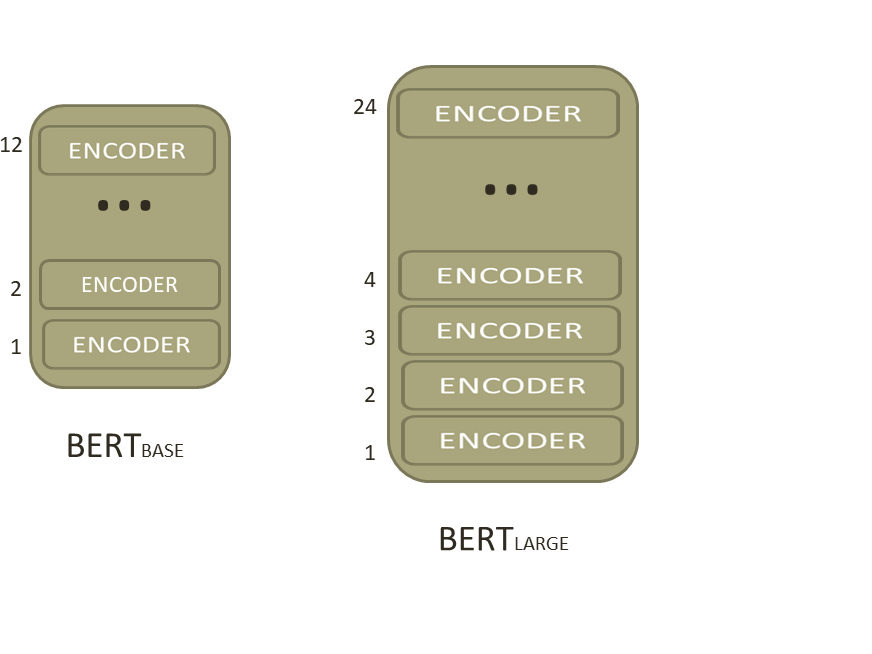

# **BERT : Preprocessing with pretrained preprocessing model** ####

BERT(Base) model documentation:   https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/4 

Text inputs have been normalized the "uncased" way, meaning that the text has been lower-cased before tokenization into word pieces, and any accent markers have been stripped. For training, random input masking has been applied independently to word pieces (as in the [original BERT paper](https://https://arxiv.org/abs/1810.04805)).

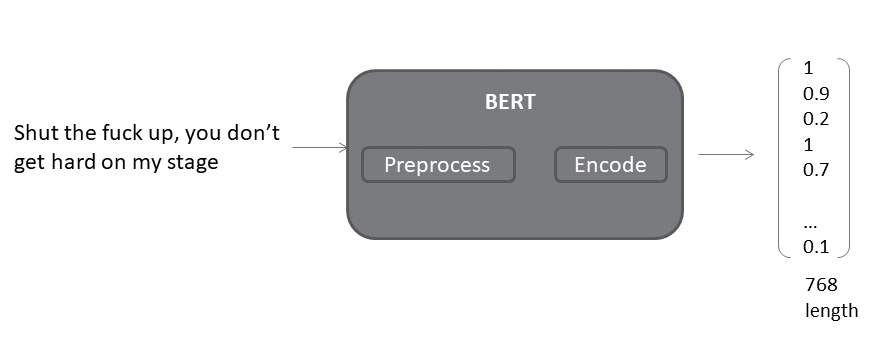

Check : https://www.tensorflow.org/hub/common_saved_model_apis/text#transformer-encoders 

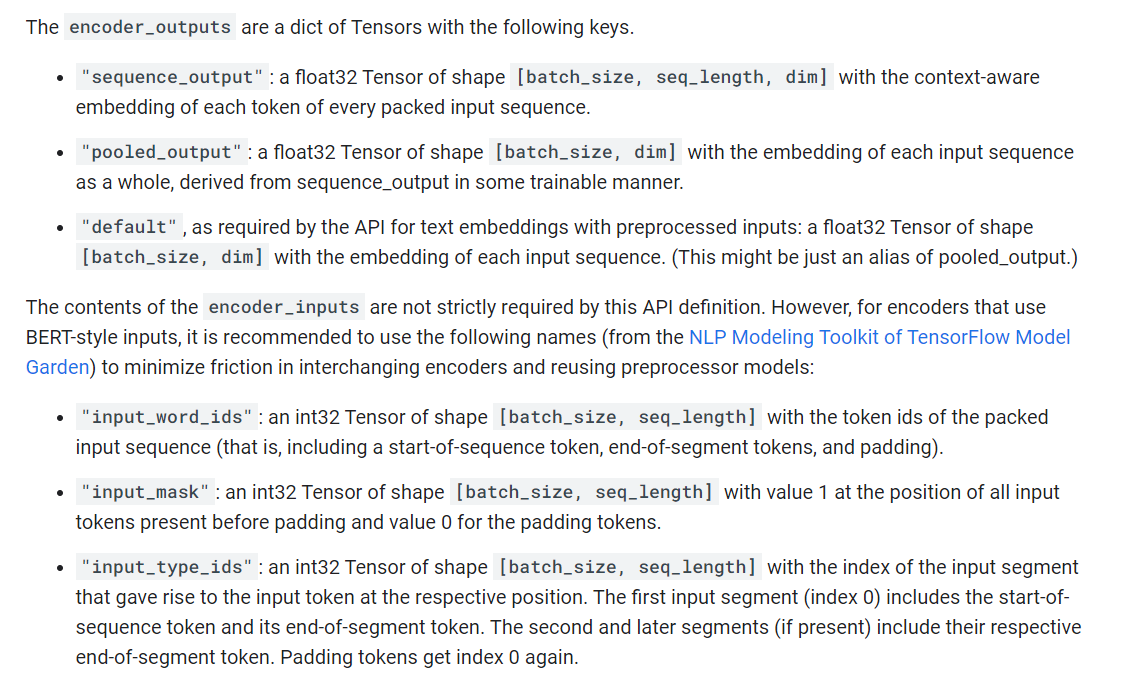

In [ ]:
# adding layers using tensorflow hub layers

bert_preprocess_model = hub.KerasLayer(bert_preprocess)

NameError: ignored

In [ ]:
## Let's test the texts with bert model 

test_randomtext = ['You are one of the unique beautiful souls. Live your life fully with laughter and blessings.....'] 
preprocess_randomtext = bert_preprocess_model(test_randomtext)
preprocess_randomtext.keys()

dict_keys(['input_mask', 'input_type_ids', 'input_word_ids'])

In [ ]:
preprocess_randomtext

{'input_mask': <tf.Tensor: shape=(1, 128), dtype=int32, numpy=
 array([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
         1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]],
       dtype=int32)>,
 'input_type_ids': <tf.Tensor: shape=(1, 128), dtype=int32, numpy=
 array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 

In [ ]:
test_randomtext2 = ['It is a nice day', 'we should go for hangout..'] 
preprocess_randomtext= bert_preprocess_model(test_randomtext2)
preprocess_randomtext.keys() 

dict_keys(['input_mask', 'input_type_ids', 'input_word_ids'])

In [ ]:
preprocess_randomtext


# BERT uses CLS as a special token at the beginning of each setence whereas SEP as a special token to separate two sentences or end single sentence
#  CLS It is a nice day SEP
#   1   1  1  1  1   1   1
# 2 sentences, so here the tensor shape = batch size 2, sequence length 128

{'input_mask': <tf.Tensor: shape=(2, 128), dtype=int32, numpy=
 array([[1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]],
       dtype=int32)>,
 'input_type_ids': <tf.Tensor: shape

# **BERT : Text Encoding with BERT model**

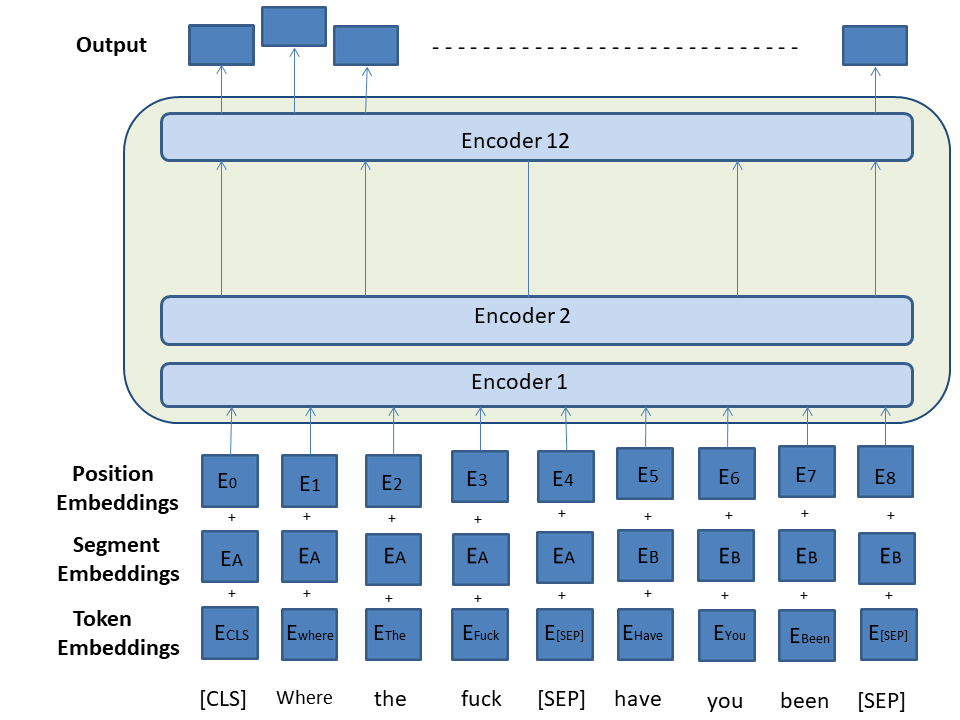

In [ ]:
bert_model = hub.KerasLayer(bert_encoder)

bertmodel_result  = bert_model(preprocess_randomtext)
bertmodel_result.keys()

dict_keys(['sequence_output', 'pooled_output', 'default', 'encoder_outputs'])

In [ ]:
bertmodel_result

{'default': <tf.Tensor: shape=(2, 768), dtype=float32, numpy=
 array([[-0.90771174, -0.49003324, -0.7746487 , ..., -0.59090686,
         -0.8029678 ,  0.9470948 ],
        [-0.9229906 , -0.42601132, -0.83578414, ..., -0.56560266,
         -0.7531485 ,  0.9398453 ]], dtype=float32)>,
 'encoder_outputs': [<tf.Tensor: shape=(2, 128, 768), dtype=float32, numpy=
  array([[[ 0.17525856,  0.04870161, -0.06895096, ...,  0.11485727,
            0.05644077,  0.06201731],
          [-0.33816478, -0.5649163 ,  0.3807826 , ...,  0.8796581 ,
            0.50903416, -0.07527562],
          [-1.0159714 , -0.6089048 ,  0.13751462, ...,  0.25191987,
            0.34321222,  0.44536704],
          ...,
          [-0.08136053, -0.191553  ,  0.69682294, ...,  0.5004709 ,
           -0.318282  , -0.0121177 ],
          [-0.19010535, -0.19724318,  0.5815922 , ...,  0.53395385,
           -0.19101326, -0.09413697],
          [-0.04055393, -0.13157943,  0.59195626, ...,  0.8670017 ,
           -0.52275777, -0.

In [ ]:
bertmodel_result['pooled_output']

# embedding vectors for the two sentences
#meaningful vectors by BERT encoding out of your statements

## as here is 2 sentences, so shape is = 2

<tf.Tensor: shape=(2, 768), dtype=float32, numpy=
array([[-0.90771174, -0.49003324, -0.7746487 , ..., -0.59090686,
        -0.8029678 ,  0.9470948 ],
       [-0.9229906 , -0.42601132, -0.83578414, ..., -0.56560266,
        -0.7531485 ,  0.9398453 ]], dtype=float32)>

In [ ]:
bertmodel_result['sequence_output']


# sequence_output : individual word embedding vectors, contextualized embedding vectors
# for each of the words in the sentence, there will be vectors of size 768

# shape=(2, 128, 768) ---> (number of sentences, padding size, vector size)

<tf.Tensor: shape=(2, 128, 768), dtype=float32, numpy=
array([[[ 0.1368815 ,  0.2674613 , -0.05848844, ..., -0.19471827,
          0.31395558,  0.26157278],
        [-0.5318253 , -0.67070127, -0.23115401, ..., -0.28015953,
          1.013765  ,  0.55815107],
        [-0.3962516 ,  0.05358479,  0.02722467, ..., -0.34065282,
         -0.34181538,  0.37462673],
        ...,
        [ 0.1091658 , -0.03155536,  0.5535681 , ...,  0.27735913,
          0.06870235,  0.06718972],
        [ 0.06526165, -0.03926713,  0.5871482 , ...,  0.34485853,
          0.05749883,  0.05818647],
        [ 0.03855009,  0.05884495,  0.5825799 , ...,  0.3197198 ,
         -0.04949712,  0.09336482]],

       [[ 0.33738345,  0.09092622,  0.08666223, ..., -0.13966343,
          0.5627084 ,  0.04513986],
        [ 0.67936635, -0.20127374,  0.0515909 , ...,  0.2320975 ,
          1.0782905 , -0.1360699 ],
        [ 0.67946625, -0.6564495 ,  0.06849909, ..., -0.44953445,
          0.43236718, -0.420037  ],
        ...,

In [ ]:
len(bertmodel_result['encoder_outputs'])

#  encoder_outputs : the length is 12, that means we are using small BERT(base). 

12

In [ ]:
bertmodel_result['encoder_outputs'][-1]

<tf.Tensor: shape=(2, 128, 768), dtype=float32, numpy=
array([[[ 0.1368815 ,  0.2674613 , -0.05848844, ..., -0.19471827,
          0.31395558,  0.26157278],
        [-0.5318253 , -0.67070127, -0.23115401, ..., -0.28015953,
          1.013765  ,  0.55815107],
        [-0.3962516 ,  0.05358479,  0.02722467, ..., -0.34065282,
         -0.34181538,  0.37462673],
        ...,
        [ 0.1091658 , -0.03155536,  0.5535681 , ...,  0.27735913,
          0.06870235,  0.06718972],
        [ 0.06526165, -0.03926713,  0.5871482 , ...,  0.34485853,
          0.05749883,  0.05818647],
        [ 0.03855009,  0.05884495,  0.5825799 , ...,  0.3197198 ,
         -0.04949712,  0.09336482]],

       [[ 0.33738345,  0.09092622,  0.08666223, ..., -0.13966343,
          0.5627084 ,  0.04513986],
        [ 0.67936635, -0.20127374,  0.0515909 , ...,  0.2320975 ,
          1.0782905 , -0.1360699 ],
        [ 0.67946625, -0.6564495 ,  0.06849909, ..., -0.44953445,
          0.43236718, -0.420037  ],
        ...,

In [ ]:
bertmodel_result['encoder_outputs'][-1] == bertmodel_result['sequence_output']

# encoder_output and sequence_output are same

<tf.Tensor: shape=(2, 128, 768), dtype=bool, numpy=
array([[[ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        ...,
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True]],

       [[ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        ...,
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True]]])>

# **BERT model : on the dataset**

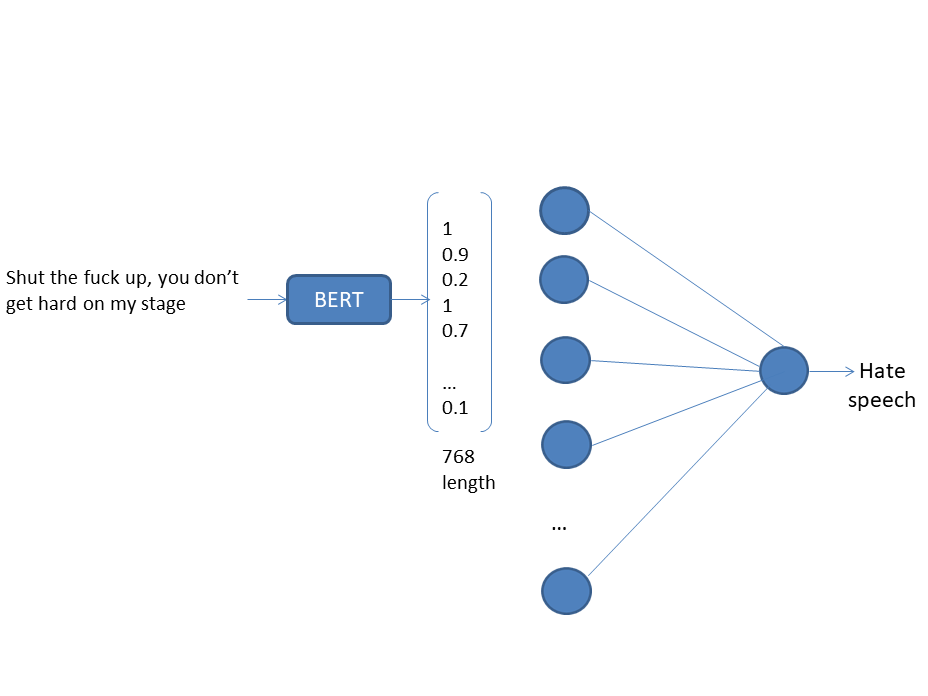

####**BERT implementation to use Keras functional-style networks in nlp/modeling :**

In [ ]:
#. Bert layers
text_input = tf.keras.layers.Input(shape=(), dtype=tf.string, name='text')
preprocessed_text = bert_preprocess(text_input)
outputs = bert_encoder(preprocessed_text)
# Neural network layers
l = tf.keras.layers.Dropout(0.1, name="dropout")(outputs['pooled_output'])
l = tf.keras.layers.Dense(1, activation='sigmoid', name="output")(l)

# Use inputs and outputs to construct a final model
model = tf.keras.Model(inputs=[text_input], outputs = [l])

In [ ]:
#summary of built model

model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 text (InputLayer)              [(None,)]            0           []                               
                                                                                                  
 keras_layer_2 (KerasLayer)     {'input_mask': (Non  0           ['text[0][0]']                   
                                e, 128),                                                          
                                 'input_type_ids':                                                
                                (None, 128),                                                      
                                 'input_word_ids':                                                
                                (None, 128)}                                                  

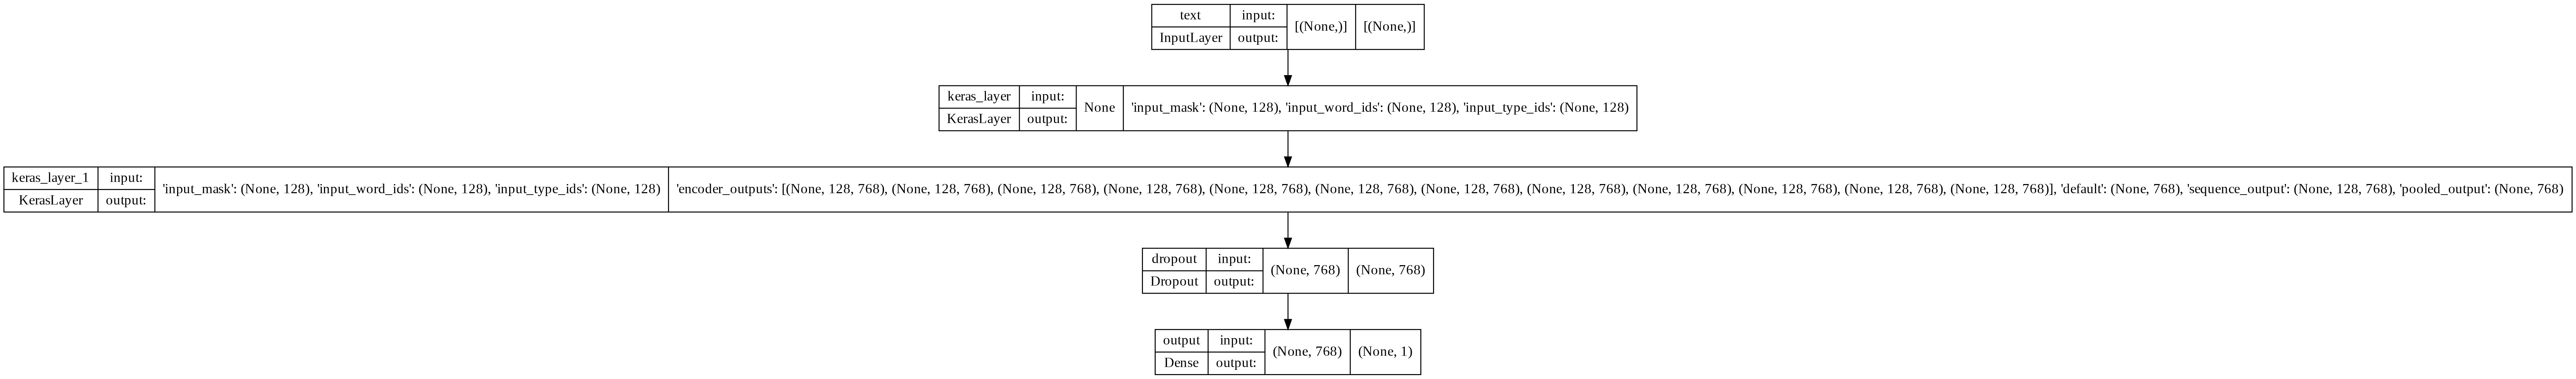

In [ ]:
tf.keras.utils.plot_model(model, show_shapes=True, dpi=200)

In [ ]:
len(X_train)

200

In [ ]:
# compile the model

METRICS = [
      tf.keras.metrics.BinaryAccuracy(name='accuracy'),
      tf.keras.metrics.Precision(name='precision'),
      tf.keras.metrics.Recall(name='recall')
]

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=METRICS)

In [ ]:
# fit the model

history = model.fit(X_train, y_train, epochs=1, batch_size=32)

7/7 [==============================] - 89s 12s/step - loss: 0.5385 - accuracy: 0.8150 - precision: 0.8191 - recall: 0.9939


In [ ]:
# Model Evaluation

model.evaluate(X_test, y_test) 

2/2 [==============================] - 20s 7s/step - loss: 0.5086 - accuracy: 0.8200 - precision: 0.8200 - recall: 1.0000


[0.5085638165473938, 0.8199999928474426, 0.8199999928474426, 1.0]

In [ ]:
y_predicted = model.predict(X_test)
y_predicted = y_predicted.flatten()

In [ ]:
y_predicted = np.where(y_predicted > 0.5, 1, 0)
y_predicted

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1])

In [ ]:
#classification Report: Confusion Matrix


from sklearn.metrics import confusion_matrix, classification_report
cm = confusion_matrix(y_test, y_predicted)
cm 

array([[ 0,  9],
       [ 0, 41]])

Text(33.0, 0.5, 'Actual')

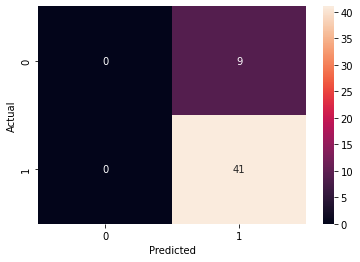

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sn
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')

In [ ]:
print(classification_report(y_test, y_predicted))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         9
           1       0.82      1.00      0.90        41

    accuracy                           0.82        50
   macro avg       0.41      0.50      0.45        50
weighted avg       0.67      0.82      0.74        50



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
plt.style.use('ggplot')

def plot_history(history):
    acc = history.history['accuracy']
    test_acc = history.history['test_accuracy']
    loss = history.history['loss']
    val_loss = history.history['test_loss']
    x = range(1, len(acc) + 1)

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(x, acc, 'b', label='Training acc')
    plt.plot(x, val_acc, 'r', label='Testing acc')
    plt.title('Training and Testing accuracy')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(x, loss, 'b', label='Training loss')
    plt.plot(x, val_loss, 'r', label='Testing loss')
    plt.title('Training and Testing loss')
    plt.legend()

In [ ]:
plot_history(history)

KeyError: ignored

# **Prediction Result**

In [ ]:
model.predict([_df.iloc[10].Text])

array([[0.9058866]], dtype=float32)

In [ ]:
_df.iloc[10].Text

"Don't Fucking touch me."

In [ ]:
model.predict([_df.iloc[100].Text])

array([[0.831465]], dtype=float32)

In [ ]:
_df.iloc[100].Text

'Shut up !'

In [ ]:
model.predict([_df.iloc[245].Text])

array([[0.9004562]], dtype=float32)

In [ ]:
_df.iloc[245].Text

'eh! here come the jokes.'